Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2022)</h2>
<h1 style="text-align: center; color:rgb(0,120,170)">Assignment 2: Document Classification with Attention and Transformers</h1>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-attention"><li style="font-size:large;font-weight:bold">Task A: Document Classification with Attention (10 points)</li></a>
    <a href="#section-classification-transformer"><li style="font-size:large;font-weight:bold">Task B: Document Classification with Transformer (10 points)</li></a>
    <a href="#section-classification-bert"><li style="font-size:large;font-weight:bold">Task C: Document Classification with BERT (5 points)</li></a>
    <a href="#section-interpretation"><li style="font-size:large;font-weight:bold">Task D: Interpreting Attention Weights (3 extra points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sequence) classification model with PyTorch using Attention networks, Transformers, and BERT. You can/should use the codes implemented in the previous assignment. Main aspects of the deep learning models in this assignment such as preprocessing, dictionary, word embeddings, data batching, loss functions, early stopping, and evaluation are explained in the previous assignment, and **are expected to be fully correct and functional in this assignment**.

The assignment has **25 points** in total as well as **3 overall extra points**. This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7) and `PyTorch` (>1.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `transformer`, `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

It is encouraged that you log and store any information about the training and evaluation of the models in an ML dashboard like [`TensorBoard`](https://www.tensorflow.org/tensorboard) or [`wandb`](https://wandb.ai/site). This can contain any important aspect of training such as the changes in the evaluation results on validation, training loss, or learning rate. 

To this end, in the case of `TensorBoard`, after finalizing all experiments and cleaning any unnecessary experiment, publish the log files results through [`TensorBoard.dev`](https://tensorboard.dev). A simple way of doing it is by running the following command in the folder of log files:

`tensorboard dev upload --name my_exp --logdir path/to/output_dir`

`TensorBoard.dev` uploads the necessary files and provides a URL to see the TensorBoard's console. Insert the URL in the cell below.

</div>

**URL :** *EDIT!*

<h1 style="color:pink">Run those cells to donwload the data and prepare the environment if you want to run task* cells</h1>

---------------------------------------------------------------------------------------------------------------------------

In [3]:
!mkdir data
!wget https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip -P ./data
!unzip data/nlpwdl2022_data.zip -d ./data

--2022-05-31 14:21:38--  https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip
Resolving drive.jku.at (drive.jku.at)... 140.78.3.241
Connecting to drive.jku.at (drive.jku.at)|140.78.3.241|:443... connected.
HTTP request sent, awaiting response... 302 
Location: /ssf/s/readFile/share/38160/1583790728782872458/publicLink/nlpwdl2022_data.zip [following]
--2022-05-31 14:21:39--  https://drive.jku.at/ssf/s/readFile/share/38160/1583790728782872458/publicLink/nlpwdl2022_data.zip
Reusing existing connection to drive.jku.at:443.
HTTP request sent, awaiting response... 200 
Length: 8936417 (8.5M) [application/zip]
Saving to: ‘./data/nlpwdl2022_data.zip’

nlpwdl2022_data.zip 100%[===================>]   8.52M  1.14MB/s    in 8.8s    

2022-05-31 14:21:48 (992 KB/s) - ‘./data/nlpwdl2022_data.zip’ saved [8936417/8936417]

Archive:  data/nlpwdl2022_data.zip
   creating: ./data/nlpwdl2021_data/
  inflating: ./data/nlpwdl2021

In [4]:
!python3 -m pip install virtualenv
!python3 -m virtualenv venv-nlp

     |████████████████████████████████| 8.8 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 461 kB 17.6 MB/s eta 0:00:01
created virtual environment CPython3.8.10.final.0-64 in 251ms
  creator CPython3Posix(dest=/home/ionelia/pycharm-projects/NLPwDL/assignment#2/venv-nlp, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/home/ionelia/.local/share/virtualenv)
    added seed packages: pip==22.0.4, setuptools==62.1.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [29]:
# !python3 -m pip install ipykernel
# !python3 -m ipykernel install --name=`${pwd}/venv-nlp`

In [ ]:
!pip install experiment-buddy
TODO add the others

<a name="section-classification-attention"></a><h2 style="color:rgb(0,120,170)">Task A: Document Classification with Attention (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Attention networks. The model is called **`ClassificationAttentionModel`** in the code, containing all various variants as explained later. The basic architecture of `ClassificationAttentionModel` is shown in the figure below.

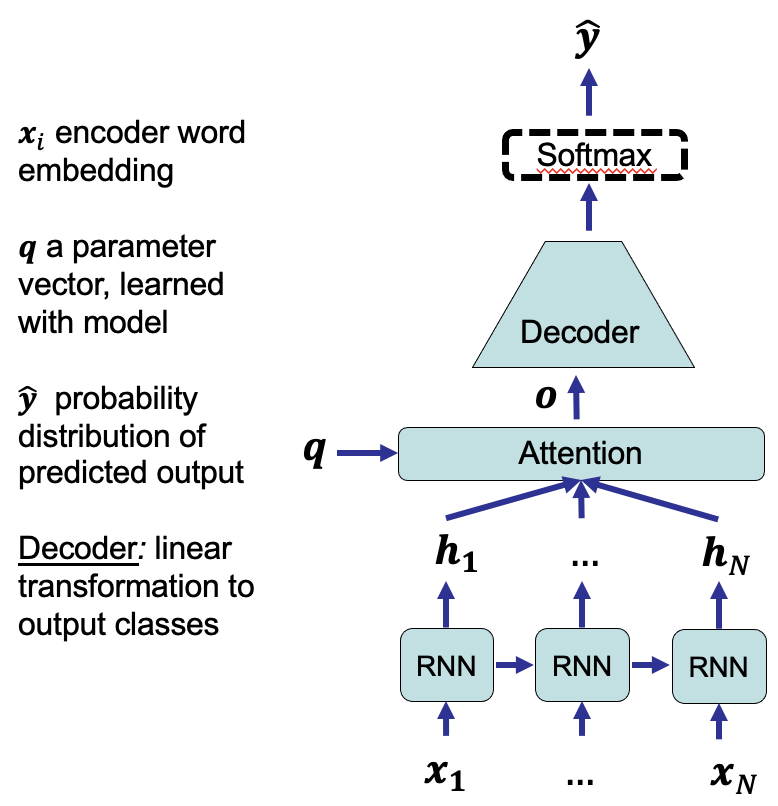

The implementation of the basic architecture of `ClassificationAttentionModel` should cover the following points:

**Baseline model**  

- **Embeddings & RNN Layer (1 points).** The baseline model first fetches the corresponding embeddings of the word IDs of a given batch. Next, a bidirectional LSTM/GRU layer is applied to the word embeddings. The hidden states of this RNN model can be seen as the contextual embeddings of the underlying word embeddings, and will be used in the next layer instead of the original word embeddings.

- **Attention Layer (4 points).** To create the Attention layer, implement an attention network that satisfies the needs of the assignment, i.e. masking as explained in the following. While it is suggested that you implement this attention network by yourself from scratch, you are allowed to use any available implementation of (single-head) attention networks. Among various implementations, the only ones that you are **NOT allowed** to use in this task are the ones based on multi-heads like `torch.nn.MultiheadAttention`. In the baseline architecture, the Attention network must be the (single-head) basic dot-product. Query vector is defined in the model initialization as *a vector of learnable parameters*, whose values will be learned together with the other model's parameters during training. The hidden states of the previous layer are passed as the values (and keys) to the Attention layer, where the Query vector is the query of the Attention. An important point in the forward pass of the Attention layer is setting correct padding masks. These should mask out the attention weights of the padded tokens of each batch. The masks excludes the corresponding vectors of these padded tokens from the calculations in Attention. If the mask is not passed correctly, the padded items will be counted in the Softmax of the Attention layer, and influence other attention weights. A sign that it is working correctly is that final attention weights of the corresponding vectors of the padded tokens are equal to zero. 

- **Prediction Layer (1 points).** The output of the Attention layer for each batch is the corresponding document embedding, passed to the decoder layer (a linear projection) and softmax to predict the probability distribution of the output classes.

- **General model functionality (1 points).** 


**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Attention Type (1 point).** Implement another type of single-head Attention other than basic dot-product.

**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

## **Task A :: Part#1** :: data visualization, understading and processing

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os
import random
from pathlib import Path
from typing import Union, Tuple, List

import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from tokenizers import Tokenizer
from tokenizers.decoders import WordPiece as WordPieceDecoder
from tokenizers.models import WordPiece
from tokenizers.normalizers import NFKC, BertNormalizer, Sequence
from tokenizers.pre_tokenizers import BertPreTokenizer
from tokenizers.trainers import WordPieceTrainer
from torch import nn, Tensor
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.nn.utils.rnn import pad_sequence
from torch.optim import Adam
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm import tqdm
import experiment_buddy
from torch.utils.tensorboard import SummaryWriter

# to make it reproducible
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [2]:
def read_data(data_path):
    data = []
    with open(data_path, 'r', encoding='UTF8') as f:
        for line in f.readlines():
            line = line.split(',', 1)[1]
            text = line.rsplit(',', 1)[0].strip('"')
            data.append(text)
    return data

In [3]:
def read_data_v2(data_path):         
    data = []
    with open(data_path, 'r', encoding='utf-8') as f:
        text = f.read()

    text = text.split('\n')
    
    for sentence in text:
        data.append(sentence)
               
    return data

In [4]:
!ls data/nlpwdl2021_data/

README.txt		  thedeep.medium.validation.txt
thedeep.labels.txt	  thedeep.small.test.txt
thedeep.medium.test.txt   thedeep.small.train.txt
thedeep.medium.train.txt  thedeep.small.validation.txt


In [3]:
loaded_all_data_dict = {'small': {'train': None, 'validation': None, 'test': None}, 'medium': {'train': None, 'validation': None, 'test': None}}

In [4]:
for data_size in ["small", "medium"]:
    for data_split in ['train', 'validation', 'test']:
        loaded_all_data_dict[data_size][data_split] = read_data_v2(f"data/nlpwdl2021_data/thedeep.{data_size}.{data_split}.txt")
        len_set_data=len(set(loaded_all_data_dict[data_size][data_split]))
        print(f"{len_set_data} num unique tokens {data_size}#{data_split}")

8401 num unique tokens small#train
1801 num unique tokens small#validation
1801 num unique tokens small#test
26601 num unique tokens medium#train
5701 num unique tokens medium#validation
5701 num unique tokens medium#test


In [37]:
set_small_medium_merged = set(loaded_all_data_dic['small']['train']+loaded_all_data_dic['medium']['train'])
print("unique tokens in combined train sets are ->",len(set_small_medium_merged))

unique tokens in combined train sets are -> 20262


In [48]:
train_df= pd.read_csv('thedeep.small.train_processed.txt')

In [128]:
with open(f'small_train+val+test.txt', 'w') as f:
    for set_name in ['train', 'validation', 'test']:
            text = loaded_all_data_dict['small'][set_name]
            for sentence in text:
                f.write(f"{sentence},{set_name}\n")

In [198]:
# merge sets medium into one file
with open(f'medium_train+val+test.txt', 'w') as f:
    for set_name in ['train', 'validation', 'test']:
            text = loaded_all_data_dict['medium'][set_name]
            for sentence in text:
                f.write(f"{sentence},{set_name}\n")

In [7]:
df_small_data_sets = df = pd.read_csv('small_train+val+test.txt' , names=["id", "text", "label", "set"])
df_medium_data_sets = df = pd.read_csv('medium_train+val+test.txt' , names=["id", "text", "label", "set"])

# remove nans
df_small_data_sets = df_small_data_sets[df_small_data_sets['label'].notna()]
df_medium_data_sets = df_medium_data_sets[df_medium_data_sets['label'].notna()]


labels = {}
with open("data/nlpwdl2021_data/thedeep.labels.txt", "r") as f:
    f = f.read().split()
    print(f)
    for label in f:
        num_label, str_label = label.split(',')
        labels[num_label] = str_label
print(labels)        


df_small_data_sets.loc[:, ('str_labels')] = [labels[str(int(i))] for i in df_small_data_sets['label'].values]
df_medium_data_sets.loc[:, ('str_labels')] = [labels[str(int(i))] for i in df_medium_data_sets['label'].values]

['0,Agriculture', '1,Cross', '2,Education', '3,Food', '4,Health', '5,Livelihood', '6,Logistic', '7,NFI', '8,Nutrition', '9,Protection', '10,Shelter', '11,WASH']
{'0': 'Agriculture', '1': 'Cross', '2': 'Education', '3': 'Food', '4': 'Health', '5': 'Livelihood', '6': 'Logistic', '7': 'NFI', '8': 'Nutrition', '9': 'Protection', '10': 'Shelter', '11': 'WASH'}


/tmp/ipykernel_735822/208382196.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_data_sets.loc[:, ('str_labels')] = [labels[str(int(i))] for i in df_medium_data_sets['label'].values]


In [48]:
df_small_data_sets

,id,text,label,set,str_labels
0,6615.0,Cholera Daily Situation Report as of 4 Novembe...,4.0,train,Health
1,659.0,"12 321 people affected, five deaths, one perso...",10.0,train,Shelter
2,8591.0,Violent clashes and inter-communal tensions ha...,3.0,train,Food
3,8373.0,AT least 12 people have been killed and severa...,5.0,train,Livelihood
4,10125.0,"Unidentified gunmen attacked a civilian home, ...",9.0,train,Protection
...,...,...,...,...,...
11997,10637.0,"In October, many households will have access t...",3.0,test,Food
11998,1285.0,"It is estimated that 1,235 villages in 266 dis...",11.0,test,WASH
11999,10963.0,The continued fuel crisis across the country i...,7.0,test,NFI
12000,10143.0,Most of displaced people rely on the scarce re...,3.0,test,Food


In [49]:
df_medium_data_sets

,id,text,label,set,str_labels
0,11609.0,"• 214,000 students affected as schools close d...",9.0,train,Protection
1,28291.0,The primary reported needs for IDPs across the...,4.0,train,Health
2,9695.0,Some 602 000 IDPs are now spread across the co...,3.0,train,Food
3,7781.0,South Sudanese soldiers accused of raping at l...,9.0,train,Protection
4,31382.0,"Since the beginning of 2017, 18 882 suspected/...",11.0,train,WASH
...,...,...,...,...,...
37997,2722.0,A total of 85 new cases of AWD were reported ...,4.0,test,Health
37998,11418.0,They also reported that 259 000 people were ev...,10.0,test,Shelter
37999,24911.0,Iraqi security officials say a double suicide ...,9.0,test,Protection
38000,31074.0,All new arrivals require health assistance. ?...,1.0,test,Cross


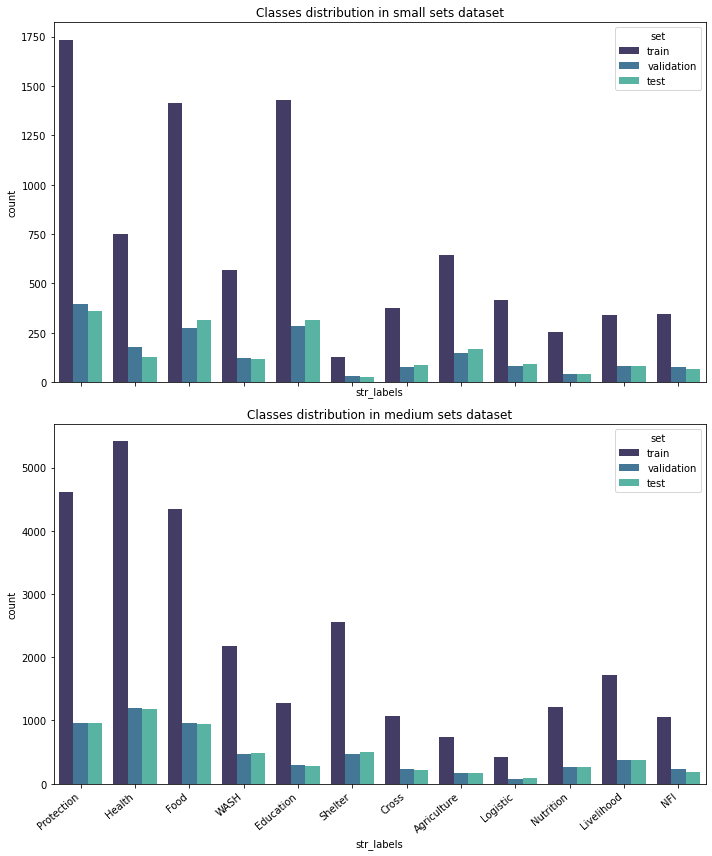

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharey=False, sharex=True, figsize=(10, 12))
ax = ax.flatten()
for df, title, i in zip([df_small_data_sets, df_medium_data_sets], ['small', 'medium'], range(0, 2)): 
    figure = sns.countplot(data=df, x='str_labels', palette='mako', hue='set', ax=ax[i]) 
    figure.set_xticklabels(figure.get_xticklabels(), rotation=40, ha="right")
    figure.set_title(title)
    figure.set_title(f"Classes distribution in {title} sets dataset")
plt.tight_layout()
plt.show()

In [30]:
len_documents = []
rows = df_small_data_sets.shape[0]
for row in range(rows):
    data = df_small_data_sets.iloc[row]
    text = data['text'].strip('"')
    len_documents.append(len(text))
    
df_small_data_sets['len_text'] = np.array(len_documents) # add new coolumns with len text    
df_small_data_sets.head(2)

,id,text,label,set,str_labels,len_text
0,6615.0,Cholera Daily Situation Report as of 4 Novembe...,4.0,train,Health,683
1,659.0,"12 321 people affected, five deaths, one perso...",10.0,train,Shelter,275


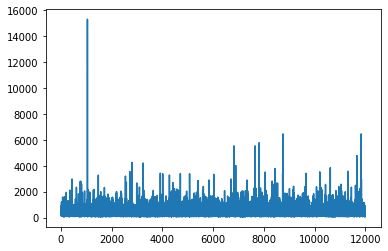

In [31]:
plt.plot(df_small_data_sets['len_text'])

In [173]:
df_small_data_sets[df_small_data_sets['set']=='train']

,id,text,label,set,str_labels,len_text
0,6615.0,Cholera Daily Situation Report as of 4 Novembe...,4.0,train,Health,683
1,659.0,"12 321 people affected, five deaths, one perso...",10.0,train,Shelter,275
2,8591.0,Violent clashes and inter-communal tensions ha...,3.0,train,Food,276
3,8373.0,AT least 12 people have been killed and severa...,5.0,train,Livelihood,884
4,10125.0,"Unidentified gunmen attacked a civilian home, ...",9.0,train,Protection,224
...,...,...,...,...,...,...
8395,528.0,Sandbag walls have failed to hold back the flo...,10.0,train,Shelter,1145
8396,2272.0,"More than 8,000 displaced civilians have been ...",10.0,train,Shelter,709
8397,11493.0,Protection Durable Solutions ? Most of the...,9.0,train,Protection,2575
8398,3816.0,She said access challenges have continued to d...,3.0,train,Food,233


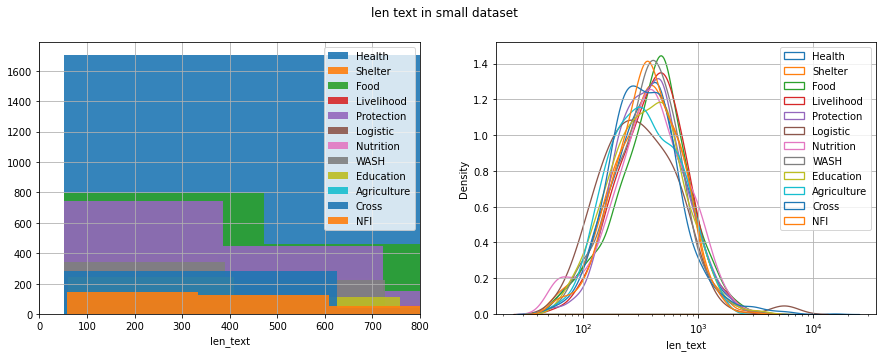

In [178]:
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
x, y = "len_text", "str_labels"
dtf = df_small_data_sets[df_small_data_sets['set']=='train']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle("len text in small dataset", fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False,  bins=10, hist_kws={"alpha":0.9},  axlabel=x, ax=ax[0])
    sns.kdeplot(dtf[dtf[y]==i][x], ax=ax[1], fill=True, common_norm=False, palette="crest", alpha=.001, linewidth=1.3, log_scale=True)
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].legend(dtf[y].unique())
ax[0].set_xlim(0, 800)
plt.show()

In [17]:
"""Below are some funtions we will be using troughtout all tasks."""

UNK_TOKEN = '[UNK]'
PAD_TOKEN = '[PAD]'

class DocumentDataset(Dataset):
    def __init__(self, path, tokenizer, document_length=300):
        super().__init__()

        self.document_length = document_length
        self.documents = []
        self.labels = []
        self.path = path
        self.tokenizer = tokenizer

        with open(self.path, 'r', encoding='UTF8') as f:
            lines = f.readlines()

        for line in lines:
            text, label = self.__preprocess_line(line)
            self.documents.append(text)
            self.labels.append(label)

        self.classes = set(self.labels)

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, index: int) -> Tuple[Tensor, Tensor]:
        if self.document_length > 0:
            token_ids = torch.zeros(self.document_length) + self._tokenize_ids('[PAD]')[0]
            document = self._tokenize_ids(self.documents[index])

            if document.shape[0] > self.document_length:
                document = document[:self.document_length]

            token_ids[:document.shape[0]] = torch.from_numpy(document)
        else:
            token_ids = torch.from_numpy(self._tokenize_ids(self.documents[index]))

        return token_ids, torch.from_numpy(np.array(self.labels[index]))

    @staticmethod
    def __preprocess_line(line) -> Tuple[str, int]:
        line = line.split(',', 1)[1]
        text, label = line.rsplit(',', 1)
        return text.strip('"'), int(label)

    @property
    def num_classes(self) -> int:
        return len(self.classes)

    def _tokenize_ids(self, text) -> np.ndarray:
        return np.array(self.tokenizer.encode(text).ids)

    def find_examples(self, model, k = 2, seed = 42) -> Tuple[List[int], List[int]]:
        correct = []
        misclassified = []

        indices = np.arange(len(self))
        np.random.seed(seed)
        np.random.shuffle(indices)

        for i in indices:
            token_ids, label = self[i]
            prediction = model.predict((token_ids.unsqueeze(0), Tensor([token_ids.shape[-1]]))).argmax()

            if len(correct) < k and prediction.item() == label:
                correct.append(i)
            elif len(misclassified) < k:
                misclassified.append(i)

            if len(misclassified) == k and len(correct) == k:
                break

        return correct, misclassified
    
    
def pad_collate(padding_value):
    def collate_fn(batch: List[Tensor]):
        inputs, targets = zip(*batch)
        input_lengths = Tensor([len(x) for x in inputs])

        inputs = pad_sequence(inputs, batch_first=True, padding_value=padding_value)
        targets = torch.stack(targets)

        return inputs, targets, input_lengths

    return collate_fn


def get_initial_embedding(path, tokenizer: Tokenizer, save_path= None) -> nn.Embedding:
    if save_path is not None and os.path.exists(save_path):
        weight = np.load(save_path)
        embedding = nn.Embedding(weight.shape[0], weight.shape[1])
        embedding.weight = nn.Parameter(torch.from_numpy(weight))
        return embedding

    pre_trained = pd.read_csv(path, sep=" ", quoting=3, header=None, index_col=0)
    embedding_size = pre_trained.shape[1]
    embedding_weigths = torch.zeros(tokenizer.get_vocab_size(), embedding_size)

    not_contained = 0
    for word, index in tqdm(tokenizer.get_vocab().items()):
        if word in pre_trained.index:
            embedding_weigths[index] = torch.from_numpy(np.array(pre_trained.loc[word]))
        else:
            not_contained += 1
            embedding_weigths[index] = torch.rand(embedding_size)

    if save_path is not None:
        np.save(save_path, embedding_weigths.detach().numpy())

    print(f'Initialized {not_contained} token(s) randomly as they are not part of the pre-trained embeddings.')

    embedding = nn.Embedding(embedding_weigths.shape[0], embedding_weigths.shape[1])
    embedding.weight = nn.Parameter(embedding_weigths)

    return embedding


def accuracy():
    def metric(y_hat: np.ndarray, y: np.ndarray) -> float:
        return (y_hat.argmax(-1) == y).sum() / y_hat.shape[0]

    return metric


def train_and_evaluate(model, optimizer, train_loader, val_loader, test_loader, logger):
    model.fit(
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        logger=logger,
        validation_metrics={
            'accuracy': accuracy()
        }
    )

    _, metrics = model.evaluate(loader=test_loader, metrics={'accuracy': accuracy()})

    return metrics['accuracy']    


def get_tokenizer(data=None, data_path=None, save_path=None, vocab_size=25_000) -> Tokenizer:
    if save_path is not None and os.path.exists(save_path):
        tokenizer = Tokenizer.from_file(save_path)
        print(f'Loaded tokenizer. Vocabulary size: {tokenizer.get_vocab_size()}.')
        return tokenizer

    if data is None:
        data = []

        with open(data_path, 'r', encoding='UTF8') as f:
            for line in f.readlines():
                line = line.split(',', 1)[1]
                text = line.rsplit(',', 1)[0].strip('"')
                data.append(text)

    tokenizer = Tokenizer(WordPiece(vocab={UNK_TOKEN: 1}, unk_token=UNK_TOKEN))

    tokenizer.normalizer = Sequence([NFKC(), BertNormalizer()])
    tokenizer.pre_tokenizer = BertPreTokenizer()
    tokenizer.decoder = WordPieceDecoder()

    trainer = WordPieceTrainer(vocab_size=vocab_size, show_progress=True, special_tokens=[UNK_TOKEN, PAD_TOKEN])
    tokenizer.train_from_iterator(data, trainer=trainer)

    if save_path is not None:
        tokenizer.save(save_path)

    print(f'Trained tokenizer. Vocabulary size: {tokenizer.get_vocab_size()}.')

    return tokenizer


def get_loaders(root_data, name_dataset_size, batch_size, tokenizer, document_length=-1):
    train_set = DocumentDataset(
        path=f'{root_data}.{name_dataset_size}.train.txt',
        tokenizer=tokenizer,
        document_length=document_length,
    )
    train_loader = DataLoader(train_set, batch_size=batch_size,
                              collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))
    val_set = DocumentDataset(
        path=f'{root_data}.{name_dataset_size}.validation.txt',
        tokenizer=tokenizer,
        document_length=document_length
    )
    val_loader = DataLoader(val_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))
    test_set = DocumentDataset(
        path=f'{root_data}.{name_dataset_size}.test.txt',
        tokenizer=tokenizer,
        document_length=document_length
    )
    test_loader = DataLoader(test_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))

    return train_loader, val_loader, test_loader

In [ ]:
class ModelInCommon(nn.Module):
    def __init__(self):
        super().__init__()

    def run_backbone(self, inputs: Tensor, input_lengths: Tensor) -> Tensor:
        if self.backbone is not None:
            embedded = pack_padded_sequence(input=inputs, lengths=input_lengths, batch_first=True, enforce_sorted=False)
            output, _ = self.backbone(embedded)
            output, _ = pad_packed_sequence(output, batch_first=True)
            assert output.shape == (*inputs.shape[:2], self.hidden_size)
        else:
            output = inputs

        return output

    def generate_padding_mask(self, batch_size: int, sequence_length: int, input_lengths: Tensor) -> Tensor:
        mask = torch.zeros(batch_size, sequence_length).bool()
        for i, input_length in enumerate(input_lengths):
            mask[i, int(input_length):] = True
        return mask

    @property
    def device(self) -> torch.device:
        return self.embedding.weight.device

    def fit(self, train_loader, val_loader, optimizer, logger, validation_metrics: Union[dict, None] = None):
        if validation_metrics is None:
            validation_metrics = {}

        initial_loss, initial_accuracy = self.evaluate(loader=val_loader, metrics=validation_metrics)
        logger.add_scalar("validation_loss", initial_loss, 0)
        logger.add_scalar("validation_accuracy", initial_accuracy['accuracy'], 0)

        for epoch in tqdm(range(1, self.epochs)):
            average_loss_epoch = self.__step(train_loader, optimizer)
            validation_loss, val_accuracy = self.evaluate(loader=val_loader, metrics=validation_metrics)

            logger.add_scalar("training_epochs_loss", average_loss_epoch, epoch - 1)
            logger.add_scalar("validation_loss", validation_loss, epoch)
            logger.add_scalar("validation_accuracy", val_accuracy['accuracy'], epoch)
            print(f"done epoch {epoch} accuracy | {val_accuracy['accuracy']}.")

            # if self.early_stopping(validation_loss): # TODO remember to put it back
            #     break

    def __step(self, data_loader, optimizer) -> float:
        self.train()
        average_loss = 0.

        for i, batch in enumerate(data_loader):
            inputs, targets = self.__unpack_batch(batch)
            optimizer.zero_grad()
            loss, _ = self._calculate_loss(inputs, targets)
            loss.backward()
            optimizer.step()
            loss = loss.item()
            average_loss += (loss - average_loss) / (i + 1)

        return average_loss

    @torch.no_grad()
    def evaluate(self, loader, metrics: dict) -> Tuple[float, dict]:
        self.eval()

        average_loss = 0.
        predictions = None
        targets = None

        for i, batch in enumerate(loader):
            x, y = self.__unpack_batch(batch)

            loss, y_hat = self._calculate_loss(x, y)
            average_loss += (loss.item() - average_loss) / (i + 1)

            if predictions is None:
                predictions = y_hat.cpu().numpy()
                targets = y.numpy()
            else:
                predictions = np.concatenate((predictions, y_hat.cpu().numpy()))
                targets = np.concatenate((targets, y.numpy()))

        metric_values = {name: metric(predictions, targets) for name, metric in metrics.items()}

        return average_loss, metric_values

    @staticmethod
    def __unpack_batch(batch: List) -> Tuple[Union[Tuple, Tensor], Tensor]:
        if len(batch) == 3:  # padded sequence
            inputs, targets, input_lengths = batch
            inputs = (inputs, input_lengths)
        else:
            inputs, targets = batch

        return inputs, targets

    def _calculate_loss(self, inputs: Tuple[Tensor, Tensor], targets: Tensor) -> Tuple[Tensor, Tensor]:
        logits, _ = self(inputs)
        return F.cross_entropy(logits, targets.long().to(self.device)), logits

    def predict(self, x: Tuple[Tensor, Tensor]) -> Tensor:
        logits, _ = self(x)
        return torch.softmax(logits, dim=-1)

    def resume_from_checkpoint(self, path: Union[Path, str]):
        self.load_state_dict(torch.load(path, map_location=self.device))

    def early_stopping(self, curr_validation_accuracy):
        """
        Stops the training if validation accuracy doesn't improve after a given patience.
        """

        if self.best_accuracy_so_far is None:
            self.counter = 0
            self.best_accuracy_so_far = curr_validation_accuracy
            torch.save(self.state_dict(), f"{self.checkpoint_path}{self.attention_type}..best.pth")

        elif curr_validation_accuracy < self.best_accuracy_so_far + self.delta:
            self.counter += 1
            print(f'EarlyStopper counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                print("early stopping triggered. training stopped.")
                return True
        else:
            print(f'Val acc increased ({self.best_accuracy_so_far:.6f} --> {curr_validation_accuracy:.6f}),model saved')
            self.best_accuracy_so_far = curr_validation_accuracy
            torch.save(self.state_dict(), f"{self.checkpoint_path}{self.attention_type}.best.pth")
            self.counter = 0

        return False

### Implementing the ClassificationAttentionModel

In [4]:
class ClassificationAttentionModel(ModelInCommon):
    def __init__(
            self,
            embedding_weights: Tensor,
            batch_size: 32,
            num_classes=12,
            hidden_size: int = 512,
            num_layers: int = 2,
            dropout: float = .5,
            freeze_embeddings: bool = False,
            attention_type: str = 'dot',
            epochs=10,
            patience=5,
            checkpoint_path=None
    ):
        """
        :attention_type: can be either 'dot' or 'additive'
        """
        super().__init__()

        self.batch_size = batch_size
        self.epochs = epochs
        self.patience = patience
        self.best_accuracy_so_far = None
        self.delta = 0.0
        self.counter = 0
        self.attention_type = attention_type
        self.checkpoint_path = checkpoint_path

        self.vocab_size, self.embedding_size = embedding_weights.shape
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_size)
        self.embedding.weight = nn.Parameter(embedding_weights, requires_grad=not freeze_embeddings)

        if hidden_size > 0:
            self.backbone = nn.LSTM(
                input_size=self.embedding_size,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout,
                bidirectional=True
            )

            self.hidden_size = hidden_size * 2
        else:
            self.backbone = None
            self.hidden_size = self.embedding_size

        single_head_attention_methods = {
            'dot': self.dot_product_attention,
            'additive': self.additive_attention,
            'multiplicative': self.multiplicative_attention
        }
        self.calculate_attention_weights = single_head_attention_methods[self.attention_type]
        self.query_dim = self.hidden_size

        self.query = nn.Parameter(torch.randn(size=(1, 1, self.query_dim)))
        self.scale = 1.0 / np.sqrt(self.query_dim)

        if attention_type == 'additive':
            self.W_queries = nn.Linear(self.query_dim, self.query_dim, bias=False)
            self.W_values = nn.Linear(self.query_dim, self.query_dim, bias=False)
            self.u = nn.Parameter(torch.randn(1, self.query_dim, 1))

        elif attention_type == 'multiplicative':
            self.W = nn.Parameter(torch.randn(self.query_dim, self.query_dim))

        self.linear = nn.Linear(self.hidden_size, num_classes)

    def forward(self, inputs: Tuple[Tensor, Tensor]) -> Tuple[Tensor, Tensor]:
        inputs, input_lengths = inputs
        batch_size, sequence_length = inputs.shape

        embedded_input = self.embedding(inputs.long().to(self.device))
        assert embedded_input.shape == (batch_size, sequence_length, self.embedding_size)

        output = self.run_backbone(embedded_input, input_lengths)
        assert output.shape == (batch_size, sequence_length, self.hidden_size)

        padding_mask = self.generate_padding_mask(batch_size, sequence_length, input_lengths).to(self.device)
        assert padding_mask.shape == (batch_size, sequence_length)

        queries = self.query.repeat(batch_size, 1, 1)
        assert queries.shape == (batch_size, 1, self.query_dim)
        attention_weights = self.calculate_attention_weights(queries, output) * self.scale
        attention_weights = attention_weights.masked_fill(padding_mask.unsqueeze(1), float('-inf'))
        normed_attention_weights = F.softmax(attention_weights, dim=-1)
        assert normed_attention_weights.shape == (batch_size, 1, sequence_length)
        output = (normed_attention_weights @ output).squeeze(1)

        return self.linear(output.squeeze(1)), normed_attention_weights

    def dot_product_attention(self, queries, values) -> Tensor:
        attention_weights = queries @ values.permute(0, 2, 1)
        return attention_weights

    def multiplicative_attention(self, queries, values) -> Tensor:
        return queries @ self.W @ values.permute(0, 2, 1)

    def additive_attention(self, queries, values) -> Tensor:
        batch_size, sequence_length, _ = values.shape
        queries = queries.repeat(1, sequence_length, 1)
        assert queries.shape == (batch_size, sequence_length, self.hidden_size)
        output = (torch.tanh(self.W_queries(queries) + self.W_values(values)) @ self.u).permute(0, 2, 1)
        assert output.shape == (batch_size, 1, sequence_length)
        return output

# Train the baseline and its variations

In [7]:
import getpass
whoami = getpass.getuser()
home = str(Path.home())
print("home:", home)

if whoami == 'ionelia':
    root_data = "/home/ionelia/pycharm-projects/NLPwDL/assignment#2/data/nlpwdl2021_data/thedeep"
    glove_path = f"{home}/pycharm-projects/NLPwDL/assignment#2/local/nlp_experiments/experiments2/glove/glove.840B" \
                     f".300d.txt"
    embedding_save_path = f"{home}/pycharm-projects/NLPwDL/assignment#2/local/nlp_experiments/experiments2" \
                          f"/initial_embedding.npy"
    tokenizer_save_path = 'tokenizer.json'
    checkpoint_path = "./checkpoints/"
elif whoami == 'ceasar':
    pass

os.makedirs(checkpoint_path, exist_ok=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device:", device)

home: /home/ionelia
device: cuda


In [76]:
name_dataset_size = "small"

## hyperparameters
batch_size = 64
document_length = -1
epochs = 50

tokenizer = get_tokenizer(data_path=f'{root_data}.{name_dataset_size}.train.txt', save_path=tokenizer_save_path)
embedding = get_initial_embedding(path=glove_path, tokenizer=tokenizer, save_path=embedding_save_path)
train_loader, val_loader, test_loader = get_loaders(root_data, name_dataset_size, batch_size, tokenizer, document_length=document_length)

# optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
# optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

Loaded tokenizer. Vocabulary size: 25000.


## 1. Run `ClassificationAttentionModel` all with dot product attention type.

In [6]:
hidden_size = 512
lr = 0.035
attention = "dot"

model_dot_product = ClassificationAttentionModel(
    embedding.weight.clone(),
    attention_type=attention,
    hidden_size=hidden_size,
    batch_size=batch_size,
    checkpoint_path=checkpoint_path,
    epochs=epochs
).to(device)
writer = SummaryWriter(comment="(small)BaselineAttentionModel dot-product attention type variation")
optimizer = torch.optim.SGD(model_dot_product.parameters(), lr=lr, momentum=0.95)
test_acc = train_and_evaluate(model_dot_product, optimizer, train_loader, val_loader, test_loader, writer)
print(f'Test accuracy: {test_acc}.')

  2%|██████▍                                                                                                                                                                                                                                                                                                                      | 1/49 [00:31<25:31, 31.91s/it]

done epoch 1 accuracy | 0.39555555555555555.


  4%|████████████▉                                                                                                                                                                                                                                                                                                                | 2/49 [01:05<25:38, 32.74s/it]

done epoch 2 accuracy | 0.5172222222222222.
EarlyStopper counter: 1 out of 10


  6%|███████████████████▍                                                                                                                                                                                                                                                                                                         | 3/49 [01:38<25:22, 33.09s/it]

done epoch 3 accuracy | 0.5794444444444444.
EarlyStopper counter: 2 out of 10


  8%|█████████████████████████▉                                                                                                                                                                                                                                                                                                   | 4/49 [02:11<24:41, 32.93s/it]

done epoch 4 accuracy | 0.6172222222222222.
EarlyStopper counter: 3 out of 10


 10%|████████████████████████████████▎                                                                                                                                                                                                                                                                                            | 5/49 [02:43<24:00, 32.74s/it]

done epoch 5 accuracy | 0.6294444444444445.
EarlyStopper counter: 4 out of 10


 12%|██████████████████████████████████████▊                                                                                                                                                                                                                                                                                      | 6/49 [03:16<23:24, 32.66s/it]

done epoch 6 accuracy | 0.6316666666666667.
EarlyStopper counter: 5 out of 10


 14%|█████████████████████████████████████████████▎                                                                                                                                                                                                                                                                               | 7/49 [03:49<22:55, 32.74s/it]

done epoch 7 accuracy | 0.6122222222222222.
EarlyStopper counter: 6 out of 10


 16%|███████████████████████████████████████████████████▊                                                                                                                                                                                                                                                                         | 8/49 [04:21<22:11, 32.48s/it]

done epoch 8 accuracy | 0.6155555555555555.
EarlyStopper counter: 7 out of 10


 18%|██████████████████████████████████████████████████████████▏                                                                                                                                                                                                                                                                  | 9/49 [04:53<21:31, 32.30s/it]

done epoch 9 accuracy | 0.6066666666666667.
EarlyStopper counter: 8 out of 10


 20%|████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                                                                           | 10/49 [05:25<20:57, 32.24s/it]

done epoch 10 accuracy | 0.6216666666666667.
EarlyStopper counter: 9 out of 10


 20%|████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                                                                           | 10/49 [05:57<23:13, 35.72s/it]

done epoch 11 accuracy | 0.6238888888888889.
EarlyStopper counter: 10 out of 10
early stopping triggered. training stopped and model is saved.


Test accuracy: 0.6327777777777778.


## 2. Train `ClassificationAttentionModel` **without RNA** layer.

In [8]:
hidden_size = -1  # here `-1` won't load the lstm layer
lr = 0.035 
attention = "dot"
epochs = 50

model_no_rna = ClassificationAttentionModel(
    embedding.weight.clone(),
    attention_type=attention,
    hidden_size=hidden_size,
    batch_size=batch_size,
    checkpoint_path=checkpoint_path,
    epochs=epochs,
    model_name_siffix="no_rna_small"
).to(device)
writer = SummaryWriter(comment="(small)BaselineAttentionModel no RNA layer variation")
# optimizer = Adam(model.parameters(), lr=lr, weight_decay=0.2)
optimizer = torch.optim.SGD(model_no_rna.parameters(), lr=lr, momentum=0.95)
test_acc = train_and_evaluate(model_no_rna, optimizer, train_loader, val_loader, test_loader, writer)

  2%|██████▍                                                                                                                                                                                                                                                                                                                      | 1/49 [00:02<02:03,  2.57s/it]

done epoch 1 accuracy | 0.49833333333333335.


  4%|████████████▉                                                                                                                                                                                                                                                                                                                | 2/49 [00:05<02:00,  2.55s/it]

done epoch 2 accuracy | 0.5983333333333334.
EarlyStopper counter: 1 out of 10


  6%|███████████████████▍                                                                                                                                                                                                                                                                                                         | 3/49 [00:07<01:57,  2.55s/it]

done epoch 3 accuracy | 0.6255555555555555.
EarlyStopper counter: 2 out of 10


  8%|█████████████████████████▉                                                                                                                                                                                                                                                                                                   | 4/49 [00:10<01:54,  2.54s/it]

done epoch 4 accuracy | 0.6311111111111111.
EarlyStopper counter: 3 out of 10


 10%|████████████████████████████████▎                                                                                                                                                                                                                                                                                            | 5/49 [00:12<01:51,  2.54s/it]

done epoch 5 accuracy | 0.6377777777777778.
EarlyStopper counter: 4 out of 10


 12%|██████████████████████████████████████▊                                                                                                                                                                                                                                                                                      | 6/49 [00:15<01:49,  2.54s/it]

done epoch 6 accuracy | 0.6383333333333333.
EarlyStopper counter: 5 out of 10


 14%|█████████████████████████████████████████████▎                                                                                                                                                                                                                                                                               | 7/49 [00:17<01:46,  2.54s/it]

done epoch 7 accuracy | 0.6411111111111111.
EarlyStopper counter: 6 out of 10


 16%|███████████████████████████████████████████████████▊                                                                                                                                                                                                                                                                         | 8/49 [00:20<01:44,  2.54s/it]

done epoch 8 accuracy | 0.64.
EarlyStopper counter: 7 out of 10


 18%|██████████████████████████████████████████████████████████▏                                                                                                                                                                                                                                                                  | 9/49 [00:22<01:41,  2.55s/it]

done epoch 9 accuracy | 0.6405555555555555.
EarlyStopper counter: 8 out of 10


 20%|████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                                                                           | 10/49 [00:25<01:39,  2.56s/it]

done epoch 10 accuracy | 0.6416666666666667.
EarlyStopper counter: 9 out of 10


 20%|████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                                                                           | 10/49 [00:28<01:49,  2.81s/it]

done epoch 11 accuracy | 0.6416666666666667.
EarlyStopper counter: 10 out of 10
early stopping triggered. training stopped and model is saved.


In [11]:
print(test_acc)

0.6394444444444445


## 3. Train `ClassificationAttentionModel` with the **additive** attention type.

In [35]:
hidden_size = 512
lr = 0.035
attention = "additive"

model_additive = ClassificationAttentionModel(
    embedding.weight.clone(),
    attention_type=attention,
    hidden_size=hidden_size,
    batch_size=batch_size,
    checkpoint_path=checkpoint_path,
    epochs=epochs
).to(device)

writer = SummaryWriter(comment="(small)BaselineAttentionModel additive attention type variation")

optimizer = torch.optim.SGD(model_additive.parameters(), lr=lr, momentum=0.95)

test_acc = train_and_evaluate(model_additive, optimizer, train_loader, val_loader, test_loader, writer)
print(f'Test accuracy: {test_acc}.')

  2%|██████▍                                                                                                                                                                                                                                                                                                                      | 1/49 [00:38<30:43, 38.41s/it]

done epoch 1 accuracy | 0.4077777777777778.


  4%|████████████▉                                                                                                                                                                                                                                                                                                                | 2/49 [01:16<30:05, 38.42s/it]

done epoch 2 accuracy | 0.5383333333333333.
EarlyStopper counter: 1 out of 5


  6%|███████████████████▍                                                                                                                                                                                                                                                                                                         | 3/49 [01:55<29:30, 38.49s/it]

done epoch 3 accuracy | 0.5944444444444444.
EarlyStopper counter: 2 out of 5


  8%|█████████████████████████▉                                                                                                                                                                                                                                                                                                   | 4/49 [02:34<29:01, 38.69s/it]

done epoch 4 accuracy | 0.5988888888888889.
EarlyStopper counter: 3 out of 5


 10%|████████████████████████████████▎                                                                                                                                                                                                                                                                                            | 5/49 [03:13<28:26, 38.79s/it]

done epoch 5 accuracy | 0.6166666666666667.
EarlyStopper counter: 4 out of 5


 10%|████████████████████████████████▎                                                                                                                                                                                                                                                                                            | 5/49 [03:52<34:06, 46.51s/it]

done epoch 6 accuracy | 0.62.
EarlyStopper counter: 5 out of 5
early stopping triggered. training stopped and model is saved.


Test accuracy: 0.6272


### Repeat 1)2)3) above but this time on the medium size dataset.

In [15]:
name_dataset_size = "medium"

## hyperparameters
batch_size = 64
document_length = -1
epochs = 50
hidden_size = 512
lr = 0.035

tokenizer = get_tokenizer(data_path=f'{root_data}.{name_dataset_size}.train.txt', save_path=tokenizer_save_path)
embedding = get_initial_embedding(path=glove_path, tokenizer=tokenizer, save_path=embedding_save_path)
train_loader, val_loader, test_loader = get_loaders(root_data, name_dataset_size, batch_size, tokenizer, document_length=document_length)

print("------------------------------------------------------------------")
print("Train ClassificationAttentionModel with dot-product attention type....")
attention = "dot"
model_dot_product = ClassificationAttentionModel(
    embedding.weight.clone(),
    attention_type=attention,
    hidden_size=hidden_size,
    batch_size=batch_size,
    checkpoint_path=checkpoint_path,
    epochs=epochs,
    model_name_siffix="medium"
).to(device)
writer = SummaryWriter(comment="(medium)BaselineAttentionModel dot-product attention type variation")
optimizer = torch.optim.SGD(model_dot_product.parameters(), lr=lr, momentum=0.95)
test_acc = train_and_evaluate(model_dot_product, optimizer, train_loader, val_loader, test_loader, writer)
print(f'Test accuracy: {test_acc}.')
del model_dot_product


print("------------------------------------------------------------------")
print("2. Train ClassificationAttentionModel without RNA layer.")
model_no_rna = ClassificationAttentionModel(
    embedding.weight.clone(),
    attention_type=attention,
    hidden_size=hidden_size,
    batch_size=batch_size,
    checkpoint_path=checkpoint_path,
    epochs=epochs,
    model_name_siffix="no_rna_medium"
).to(device)
writer = SummaryWriter(comment="(medium)BaselineAttentionModel no RNA layer variation")
optimizer = torch.optim.SGD(model_no_rna.parameters(), lr=lr, momentum=0.95)
test_acc = train_and_evaluate(model_no_rna, optimizer, train_loader, val_loader, test_loader, writer)
del model_no_rna


print("------------------------------------------------------------------")
print("3. Train ClassificationAttentionModel with the additive attention type.")
attention = "additive"
model_additive = ClassificationAttentionModel(
    embedding.weight.clone(),
    attention_type=attention,
    hidden_size=hidden_size,
    batch_size=batch_size,
    checkpoint_path=checkpoint_path,
    epochs=epochs,
    model_name_siffix="medium"
).to(device)
writer = SummaryWriter(comment="(medium)BaselineAttentionModel additive attention type variation")
optimizer = torch.optim.SGD(model_additive.parameters(), lr=lr, momentum=0.95)
test_acc = train_and_evaluate(model_additive, optimizer, train_loader, val_loader, test_loader, writer)
print(f'Test accuracy: {test_acc}.')
del model_additive

Loaded tokenizer. Vocabulary size: 25000.
------------------------------------------------------------------
Train ClassificationAttentionModel with dot-product attention type....


  2%|██████▍                                                                                                                                                                                                                                                                                                                   | 1/49 [01:40<1:20:30, 100.64s/it]

done epoch 1 accuracy | 0.6019298245614035.


  4%|████████████▊                                                                                                                                                                                                                                                                                                             | 2/49 [03:28<1:22:02, 104.74s/it]

done epoch 2 accuracy | 0.639298245614035.
EarlyStopper counter: 1 out of 10


  6%|███████████████████▏                                                                                                                                                                                                                                                                                                      | 3/49 [05:15<1:21:11, 105.91s/it]

done epoch 3 accuracy | 0.6505263157894737.
EarlyStopper counter: 2 out of 10


  8%|█████████████████████████▋                                                                                                                                                                                                                                                                                                | 4/49 [07:02<1:19:42, 106.28s/it]

done epoch 4 accuracy | 0.6507017543859649.
EarlyStopper counter: 3 out of 10


 10%|████████████████████████████████                                                                                                                                                                                                                                                                                          | 5/49 [08:49<1:18:16, 106.74s/it]

done epoch 5 accuracy | 0.6566666666666666.
EarlyStopper counter: 4 out of 10


 12%|██████████████████████████████████████▍                                                                                                                                                                                                                                                                                   | 6/49 [10:30<1:15:04, 104.75s/it]

done epoch 6 accuracy | 0.6594736842105263.
EarlyStopper counter: 5 out of 10


 14%|████████████████████████████████████████████▊                                                                                                                                                                                                                                                                             | 7/49 [12:13<1:12:44, 103.93s/it]

done epoch 7 accuracy | 0.66.
EarlyStopper counter: 6 out of 10


 16%|███████████████████████████████████████████████████▎                                                                                                                                                                                                                                                                      | 8/49 [13:52<1:10:07, 102.63s/it]

done epoch 8 accuracy | 0.659298245614035.
EarlyStopper counter: 7 out of 10


 18%|█████████████████████████████████████████████████████████▋                                                                                                                                                                                                                                                                | 9/49 [15:32<1:07:48, 101.72s/it]

done epoch 9 accuracy | 0.6619298245614035.
EarlyStopper counter: 8 out of 10


 20%|███████████████████████████████████████████████████████████████▉                                                                                                                                                                                                                                                         | 10/49 [17:12<1:05:44, 101.13s/it]

done epoch 10 accuracy | 0.6547368421052632.
EarlyStopper counter: 9 out of 10


 20%|███████████████████████████████████████████████████████████████▉                                                                                                                                                                                                                                                         | 10/49 [18:53<1:13:39, 113.33s/it]

done epoch 11 accuracy | 0.6480701754385965.
EarlyStopper counter: 10 out of 10
early stopping triggered. training stopped and model is saved.


Test accuracy: 0.6545614035087719.
------------------------------------------------------------------
2. Train ClassificationAttentionModel without RNA layer.


  2%|██████▍                                                                                                                                                                                                                                                                                                                   | 1/49 [01:47<1:25:49, 107.29s/it]

done epoch 1 accuracy | 0.5819298245614035.


  4%|████████████▊                                                                                                                                                                                                                                                                                                             | 2/49 [03:35<1:24:35, 107.99s/it]

done epoch 2 accuracy | 0.6457894736842106.
EarlyStopper counter: 1 out of 10


  6%|███████████████████▏                                                                                                                                                                                                                                                                                                      | 3/49 [05:21<1:22:08, 107.13s/it]

done epoch 3 accuracy | 0.6533333333333333.
EarlyStopper counter: 2 out of 10


  8%|█████████████████████████▋                                                                                                                                                                                                                                                                                                | 4/49 [07:01<1:18:16, 104.36s/it]

done epoch 4 accuracy | 0.6563157894736842.
EarlyStopper counter: 3 out of 10


 10%|████████████████████████████████                                                                                                                                                                                                                                                                                          | 5/49 [08:45<1:16:15, 104.00s/it]

done epoch 5 accuracy | 0.6585964912280702.
EarlyStopper counter: 4 out of 10


 12%|██████████████████████████████████████▍                                                                                                                                                                                                                                                                                   | 6/49 [10:27<1:14:00, 103.28s/it]

done epoch 6 accuracy | 0.6607017543859649.
EarlyStopper counter: 5 out of 10


 14%|████████████████████████████████████████████▊                                                                                                                                                                                                                                                                             | 7/49 [12:13<1:12:55, 104.17s/it]

done epoch 7 accuracy | 0.6610526315789473.
EarlyStopper counter: 6 out of 10


 16%|███████████████████████████████████████████████████▎                                                                                                                                                                                                                                                                      | 8/49 [14:07<1:13:26, 107.49s/it]

done epoch 8 accuracy | 0.6589473684210526.
EarlyStopper counter: 7 out of 10


 18%|█████████████████████████████████████████████████████████▋                                                                                                                                                                                                                                                                | 9/49 [15:50<1:10:41, 106.03s/it]

done epoch 9 accuracy | 0.6568421052631579.
EarlyStopper counter: 8 out of 10


 20%|███████████████████████████████████████████████████████████████▉                                                                                                                                                                                                                                                         | 10/49 [17:30<1:07:45, 104.24s/it]

done epoch 10 accuracy | 0.655438596491228.
EarlyStopper counter: 9 out of 10


 20%|███████████████████████████████████████████████████████████████▉                                                                                                                                                                                                                                                         | 10/49 [18:48<1:13:20, 112.83s/it]

KeyboardInterrupt



In [14]:
del model_dot_product

### Report

| Dataset | ClassificationAttentionModel variation | Accuracy |
|---|:---:| :---:|
|small | dot-product |  | 
|small | no RNA layer* | |
|small | attentive attention | |
|medium | dot-product | 0.6545614035087719 | 
|medium | no RNA layer* |? |
|medium | attentive attention | ? |

*with dot-product attention type

....TODO...

- hypermarameters search
- architecture built
- accuracies on the no RNN/ yes RNN and yes RNN with different attnetion types.


sweep for hyperparamer search for the baseline mode with dot-product variation: https://wandb.ai/ionelia/document-classfication-with-Attention/sweeps/odhes3nd?workspace=user-ionelia

<a name="section-classification-transformer"></a><h2 style="color:rgb(0,120,170)">Task B: Document Classification with Transformer (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Transformer Decoder. This model is called **`ClassificationTransformerModel`** in the code, containing all various variants as explained later. 

The implementation of the basic architecture of `ClassificationTransformerModel` covers the following points:

**Baseline model:** The architecture of baseline `ClassificationTransformerModel`is the exactly the same as the one of `ClassificationAttentionModel`. The only difference is that `ClassificationTransformerModel` replaces the Attention layer with a Transformer Decoder. 

- **Transformer Decoder (3 points).** Use `torch.nn.TransformerDecoder` class or any other implementation of Transformer Decoder. The baseline model consists of one layer of Transformer Decoder and is defined with default parameters of Transformer Decoder. As before, Query vector is defined separately, and used as the query of the Transformer.

- **Model Functionality (1 point).**

**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationTransformerModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Transformer Encoder (3 point).** Replace the RNN layer with a Transformer Encoder. Similar to the RNN, the aim of this layer is to provide contextual embeddings of the input word embeddings. 

- **Number of heads (1 point).** Study the effect of increasing/decreasing the number of heads of the Transformer Decoder.

- **Number of layers (1 point).** Study the effect of increasing the layers of the Transformer Decoder.


**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.
</div>

In [ ]:
class ClassificationTransformerModel(ModelInCommon):
    def __init__(
            self,
            embedding_weights,
            num_classes=12,
            hidden_size=512,
            num_layers=2,
            dropout=.5,
            freeze_embeddings=False,
            num_heads=1,
            num_transformer_layers=1,
            batch_size=32,
            epochs=10,
            patience=5,
            checkpoint_path=None
    ):
        super().__init__()

        self.vocab_size, self.embedding_size = embedding_weights.shape
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_size)
        self.embedding.weight = nn.Parameter(embedding_weights, requires_grad=not freeze_embeddings)

        self.batch_size = batch_size
        self.epochs = epochs
        self.patience = patience
        self.best_accuracy_so_far = None
        self.delta = 0.0
        self.counter = 0
        self.checkpoint_path = checkpoint_path
        self.num_heads = num_heads

        if hidden_size > 0:
            self.backbone = nn.LSTM(
                input_size=self.embedding_size,
                hidden_size=hidden_size,
                num_layers=num_layers,
                batch_first=True,
                dropout=dropout,
                bidirectional=True
            )

            self.hidden_size = hidden_size * 2
        else:
            self.backbone = None
            self.hidden_size = self.embedding_size

        self.transformer = nn.TransformerEncoder(
            encoder_layer=nn.TransformerEncoderLayer(self.hidden_size, num_heads),
            num_layers=num_transformer_layers
        )
        self.linear = nn.Linear(self.hidden_size, num_classes)

    def forward(self, input):
        inputs, input_lengths = inputs
        batch_size, sequence_length = inputs.shape
        embedded = self.embedding(inputs.long().to(self.device))
        output = self.run_backbone(embedded, input_lengths)
        _padding_mask=self.generate_padding_mask(batch_size, sequence_length, input_lengths)
        output = self.transformer(output.permute(1, 0, 2), src_key_padding_mask=_padding_mask.to(self.device))
        return self.linear(output[0]), None

In [ ]:
# TODO train transformer

<a name="section-classification-bert"></a><h2 style="color:rgb(0,120,170)">Task C: Document Classification with BERT (5 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using BERT. This model is called **`ClassificationBERTModel`**.

**Model Functionality (4 points):** Use the `transformers` library from `huggingface` to load a (small) pre-trained BERT model for document classification. Select a BERT model according to your available resources. The available models can be found [here](https://huggingface.co/models) and [here](https://github.com/google-research/bert). The weights of the BERT model should be fine-tuned using the available training data of the task. Consult the documentation of `huggingface` for a correct implementation of the classifier. 

**Reporting and discussion (1 point).** Evaluate the model and report the results.

</div>

<a name="section-interpretation"></a><h2 style="color:rgb(0,120,170)">Task D: Interpreting Attention Weights (3 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The aim of this task is to provide an interpretation of the functionality of one of the models, by exploring which words have the higher contributions to the prediction results of some specific documents. 

**Attention weights (2.5 extra points):** Select one of the models trained in the previous tasks as you prefer. Select four documents from test set, such that two are correctly and the other two are incorrectly classified by the model. Next, run the forward pass for each of these documents and extract the corresponding attention weights from the model. Separately for each document, interpret the mechanism of the classifier by looking at the words with the highest attention weights. Do these words – in your opinion – provide important information to the predicted class?

**Visualization (0.5 overall extra points):** Visualize the attention weights over document’s words. Some suggested tools and resources:

https://github.com/minqi/hnatt

https://github.com/jiesutd/Text-Attention-Heatmap-Visualization 

https://github.com/cbaziotis/neat-vision
</div>

In [29]:
name_dataset_size = "small"

## hyperparameters
batch_size = 64
document_length = -1
epochs = 50

tokenizer = get_tokenizer(data_path=f'{root_data}.{name_dataset_size}.train.txt', save_path=tokenizer_save_path)
embedding = get_initial_embedding(path=glove_path, tokenizer=tokenizer, save_path=embedding_save_path)

test_set = DocumentDataset(path=f'{root_data}.{name_dataset_size}.test.txt', tokenizer=tokenizer, document_length=document_length)

model = ClassificationAttentionModel(embedding.weight.clone(), attention_type='additive', batch_size=32).to(device)
model.load_state_dict(torch.load('/home/ionelia/pycharm-projects/NLPwDL/assignment#2/checkpoints/additive.best.pth'))

correct, misclassified = test_set.find_examples(model, seed=0)

Loaded tokenizer. Vocabulary size: 25000.


In [ ]:
TODO vis 